# HIV Model

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


In [2]:
state = State(r=200, l=0, e=0, v=4e-7) 

,values
r,2.000000e+02
l,0.000000e+00
e,0.000000e+00
v,4.000000e-07


In [15]:
system = System(gamma = 1.36,
                tau = 0.2,
                mu = 1.36e-3,
                beta = 0.00027,
                alpha = 3.6e-2,
                delta = 0.33,
                pi = 100,
                sigma = 2,
                rho = 0.1,
                t0 = 0,
                t_end = 120,
                dt = 0.1)

,values
gamma,1.36000
tau,0.20000
mu,0.00136
beta,0.00027
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000
rho,0.10000
t0,0.00000


In [16]:
def update_func(state, t, system):
    R, L, E, V = state
    unpack(system)
    
    drdt = ((gamma * tau) - (mu * R) - (beta * R * V))
    dldt = ((rho * beta * R * V) - (mu * L)- (alpha * L))
    dedt = (((1-rho) * beta * R * V) + (alpha * L) - (delta * E))
    dvdt = ((pi * E) - (sigma * V))
 
    R += drdt * dt
    L += dldt * dt
    E += dedt * dt
    V += dvdt * dt

    return State(r=R, l=L, e=E, v=V)

In [17]:
print(state)

r    2.000000e+02
l    0.000000e+00
e    0.000000e+00
v    4.000000e-07
dtype: float64


In [1]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, t_end, dt):
        frame.row[t + dt] = update_func(frame.row[t], t, system)
    
    return frame

In [2]:
update_func(state, 1, system)

NameError: name 'update_func' is not defined

In [20]:
results = run_simulation(system, update_func)

,r,l,e,v
0.0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.1,200.000000,2.160000e-10,1.944000e-09,3.200000e-07
0.2,200.000000,3.879930e-10,3.435826e-09,2.754400e-07
0.3,200.000000,5.352811e-10,4.662479e-09,2.547103e-07
0.4,200.000000,6.708248e-10,5.748436e-09,2.503930e-07
0.5,200.000000,8.035308e-10,6.778062e-09,2.577987e-07
0.6,200.000000,9.397402e-10,7.810181e-09,2.740196e-07
0.7,200.000000,1.084200e-09,8.887563e-09,2.973175e-07
0.8,200.000000,1.240701e-09,1.004314e-08,3.267296e-07
0.9,200.000000,1.412500e-09,1.130409e-08,3.618151e-07


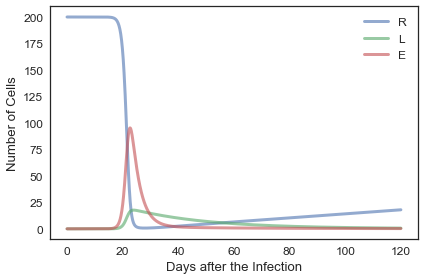

In [21]:
plot(results.r, label='R')
plot(results.l, label='L')
plot(results.e, label='E')
decorate(xlabel='Days after the Infection',
         ylabel='Number of Cells')

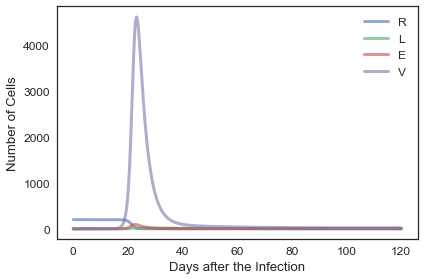

In [22]:
plot(results.r, label='R')
plot(results.l, label='L')
plot(results.e, label='E')
plot(results.v, label='V')
decorate(xlabel='Days after the Infection',
         ylabel='Number of Cells')